In [13]:
import os

import pandas as pd

# Load the uploaded data
file_path = f'{os.getcwd()}/TrendData.xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure of the file
data.sheet_names


['Training']

In [14]:
# Load the relevant sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name='Training')

# Display the first few rows of the DataFrame to understand its structure
df.head()


,Group,ParticipantID,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6,Session 7,Session 8
0,DO,6170,75.00,81.25,85.71,87.50,88.39,84.82,82.74,84.82
1,DN,514,64.29,73.21,58.04,83.04,73.21,75.89,75.89,73.21
2,DN,3097,58.04,73.21,67.86,76.79,63.39,82.14,76.79,76.79
3,Control,9580,64.29,79.46,77.68,83.93,84.82,83.04,81.25,89.29
4,Control,3691,94.64,90.18,94.64,93.75,97.32,98.21,99.11,96.43


C:\Users\haeun\AppData\Local\Temp\ipykernel_67880\3857070626.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_melted, x='Session', y='Score', hue='Group', estimator='mean', ci='sd')


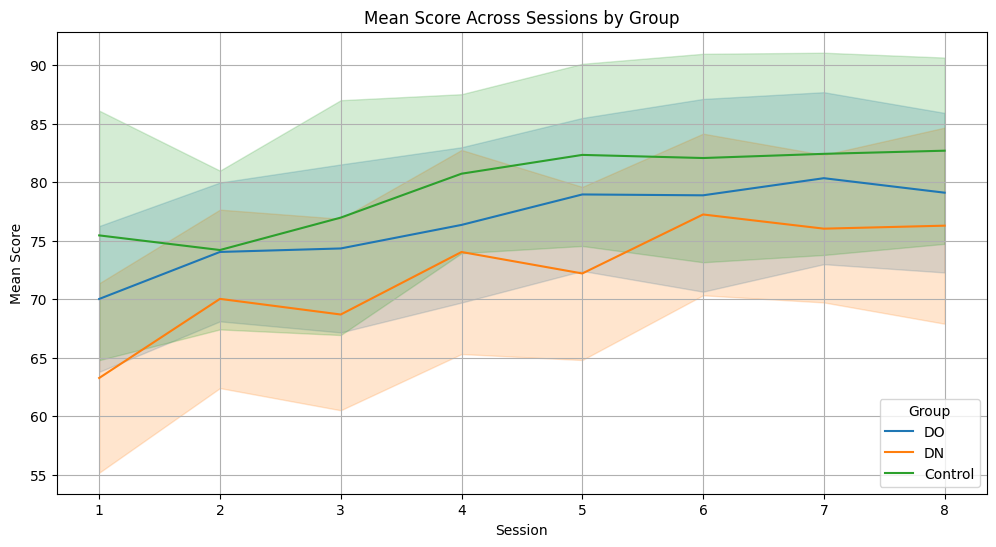

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the data for analysis
df_melted = df.melt(id_vars=['Group', 'ParticipantID'], var_name='Session', value_name='Score')

# Convert session column to a numerical format for analysis
df_melted['Session'] = df_melted['Session'].str.extract('(\d+)').astype(int)

# Overall trend analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Session', y='Score', hue='Group', estimator='mean', ci='sd')
plt.title('Mean Score Across Sessions by Group')
plt.xlabel('Session')
plt.ylabel('Mean Score')
plt.grid(True)
plt.show()


In [16]:
from scipy.stats import f_oneway, ttest_rel
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Overall improvement analysis (paired t-test between Session 1 and Session 8)
overall_session_1 = df_melted[df_melted['Session'] == 1]['Score']
overall_session_8 = df_melted[df_melted['Session'] == 8]['Score']
overall_ttest = ttest_rel(overall_session_1, overall_session_8)

# ANOVA for each group
anova_results = {}
for group in df['Group'].unique():
    group_data = df_melted[df_melted['Group'] == group]
    model = ols('Score ~ C(Session)', data=group_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[group] = anova_table

# Displaying the results
overall_ttest, anova_results


(TtestResult(statistic=np.float64(-6.259496454962927), pvalue=np.float64(3.5196887448901206e-07), df=np.int64(35)),
 {'DO':                  sum_sq    df         F    PR(>F)
  C(Session)  1030.282462   7.0  3.097537  0.005749
  Residual    4181.426500  88.0       NaN       NaN,
  'DN':                  sum_sq     df        F    PR(>F)
  C(Session)  2194.916114    7.0  5.24176  0.000038
  Residual    6221.227557  104.0      NaN       NaN,
  'Control':                  sum_sq    df         F    PR(>F)
  C(Session)   854.647099   7.0  1.672812  0.129398
  Residual    5255.017190  72.0       NaN       NaN})